In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [17]:
data = pd.read_csv("data_baharat.csv", sep=';')

# Display the first few rows to ensure it's loaded correctly
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data_baharat.csv'

In [14]:
X = data.iloc[:,:6]
y = data.iloc[:, 8]
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
348    4
349    4
350    4
351    4
352    4
Name: label, Length: 353, dtype: int64


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)
svc_model = svm.SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [16]:
print(svc_model.coef_)
print(svc_model.intercept_)

[[ 1.53606850e-09  4.32160296e-08  2.08694862e-07  3.63943789e-08
   2.98712108e-09 -3.20285461e-14]
 [ 2.18369844e-09  3.89772961e-08  1.52074767e-07  2.65035689e-08
   2.62585399e-09 -1.68644445e-14]
 [ 2.34247044e-09  6.98815899e-08  4.46423528e-07  7.86922114e-08
   9.48826328e-09 -1.31540875e-13]
 [-1.78618567e-08 -3.17756576e-08  9.04334836e-07  1.37164884e-07
   5.89621672e-09 -5.82411088e-13]
 [ 8.66036309e-05 -9.34304768e-05  1.37722724e-04 -1.96504744e-04
   9.17562301e-05 -3.53922290e-08]
 [ 9.90550951e-07  3.78251795e-06 -1.72571950e-06 -1.08345663e-06
   2.10614883e-07  7.67788783e-12]
 [-4.56814203e-09 -8.89130538e-08 -3.17579632e-07 -5.86364233e-08
  -5.20018410e-09  0.00000000e+00]
 [ 8.08950670e-10 -1.44950346e-07 -5.92430368e-07 -1.18177208e-07
  -1.00104388e-08  1.38978377e-13]
 [-4.34087449e-09 -6.49057488e-08 -2.01559793e-07 -3.64586860e-08
  -3.97272647e-09 -9.24059376e-16]
 [-6.49529059e-08 -6.84203299e-07 -1.66704318e-06 -4.03605137e-07
  -9.42181763e-08 -2.0539

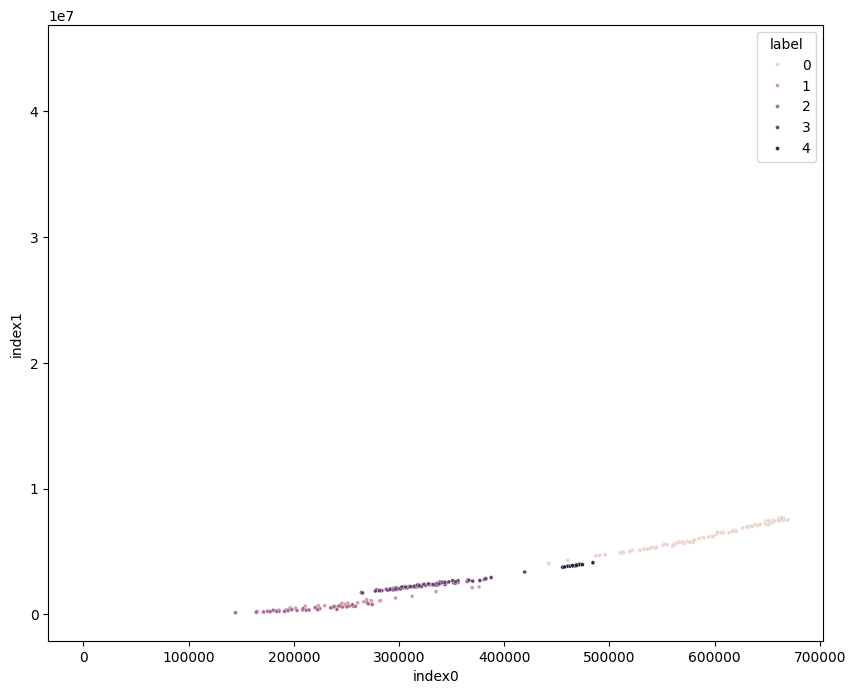

In [17]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,0], y = X_train.iloc[:,1], hue = y_train, s=8)
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[0]/w[1]) * x_points - b / w[1]

plt.plot(x_points,y_points,c='r')

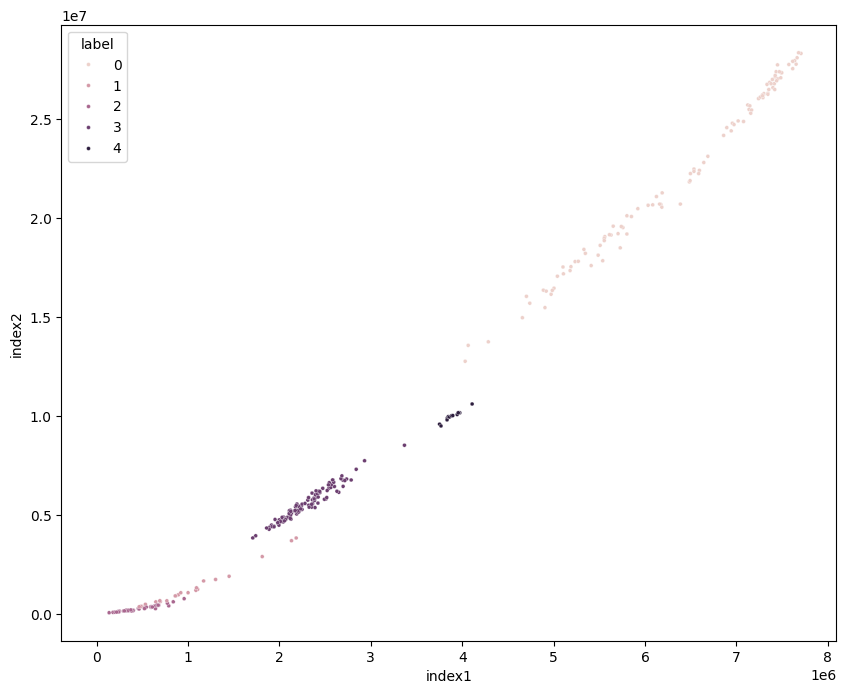

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,1], y = X_train.iloc[:,2], hue = y_train, s=8)
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[1]/w[2]) * x_points - b / w[2]

plt.plot(x_points,y_points,c='r')

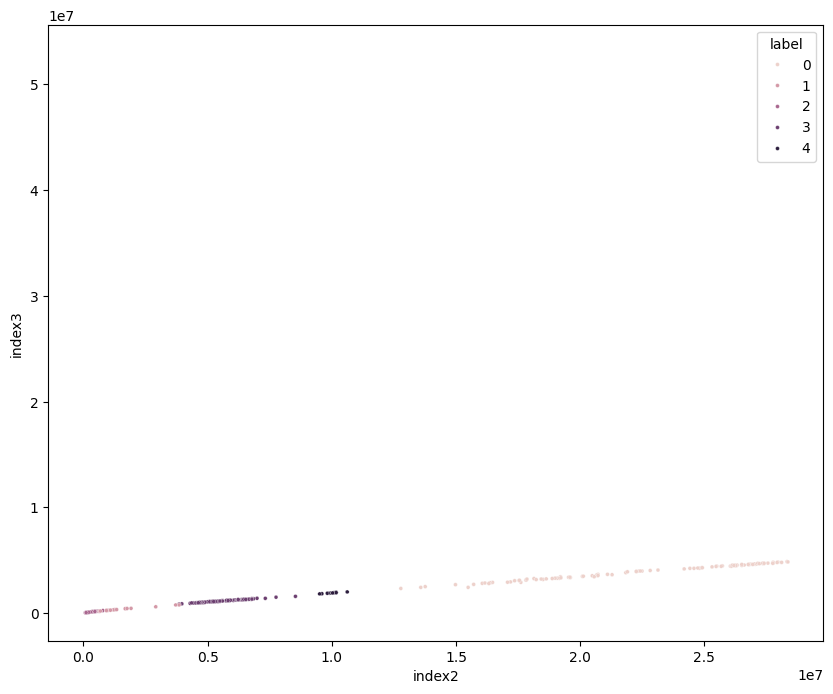

In [19]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,2], y = X_train.iloc[:,3], hue = y_train, s=8)
w = svc_model.coef_[0]
b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[2]/w[3]) * x_points - b / w[3]

plt.plot(x_points,y_points,c='r')

NameError: name 'hyperplane_points' is not defined

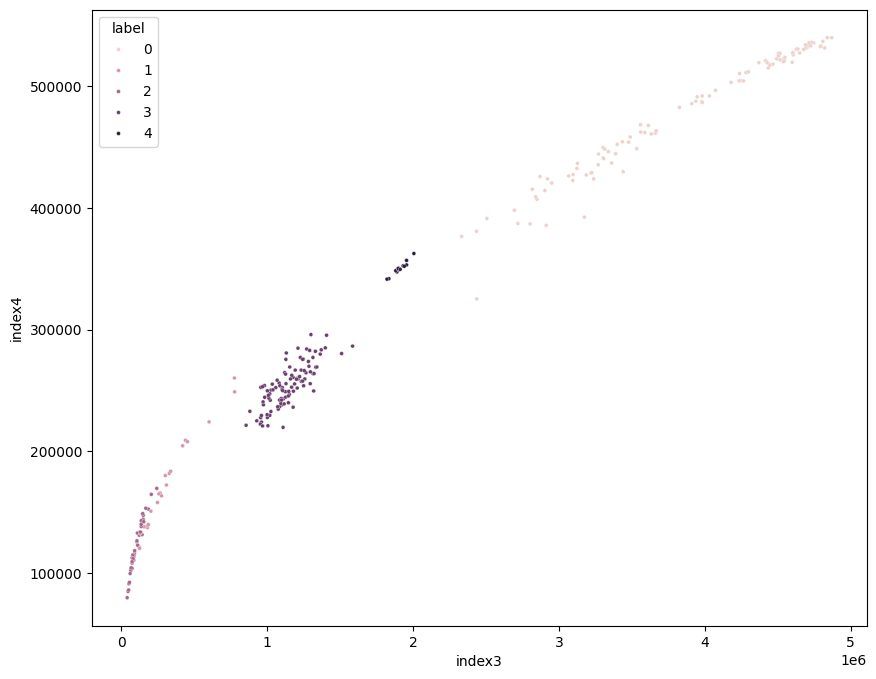

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=X_train.iloc[:,3], y = X_train.iloc[:,4], hue = y_train, s=8)
w = svc_model.coef_[0]

w_hat = w / (np.sqrt(np.sum(w ** 2)))
margin = 1 / np.sqrt(np.sum(w ** 2))

new_points_up   = hyperplane_points + w_hat * margin
new_points_down = hyperplane_points - w_hat * margin

b = svc_model.intercept_[0]
x_points = np.linspace(-1,1)
y_points = -(w[3]/w[4]) * x_points - b / w[4]

plt.plot(x_points,y_points,c='r')